In [2]:
%matplotlib inline
from __future__ import print_function, division

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *

from sympy.plotting import plot_implicit

import sympy as sy
import numpy as np; np.random.seed(42)

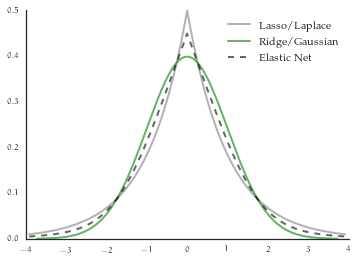

In [18]:
from scipy.stats import laplace, norm
size = figsize()[0]
size = (size, size/np.sqrt(2))
fig, ax = plt.subplots(figsize=size)
x_l = np.linspace(laplace.ppf(0.01),
                laplace.ppf(0.99), 10000)
x_g = np.linspace(norm.ppf(0.0001),
                norm.ppf(0.9999), 10000)
ax.plot(x_l, laplace.pdf(x_l),
       'grey', alpha=0.6, label='Lasso/Laplace', linewidth=2)
ax.plot(x_g, norm.pdf(x_g),
       'green', alpha=0.6, label='Ridge/Gaussian', linewidth=2)
ax.plot(x_l, 0.5*(norm.pdf(x_l) + laplace.pdf(x_l)),
       'black', alpha=0.6, label='Elastic Net', linestyle='dashed', linewidth=2)
ax.legend()
sns.despine(fig)
fig.savefig("../writing/thesis/figures/pdfs.pdf")

In [4]:
def reg_contour(func, bound, X, Y, ax):
    delta = 0.003
    lim_low = -4
    lim_hi = 4
    xrange = np.arange(lim_low, lim_hi, delta)
    yrange = np.arange(lim_low, lim_hi, delta)

    X, Y = np.meshgrid(xrange,yrange)   
    # https://stackoverflow.com/questions/31556446/drawing-axis-in-the-middle-of-the-figue-in-python
    # Position axs to origin
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Adjust label positions.
    # Note that the coordinates correspond to the matplotlib grid, not the plot coordinate system!
    ax.xaxis.set_label_coords(1,0.49)
    ax.set_xlabel("$\\alpha_1$")
    ax.yaxis.set_label_coords(0.5,1)
    ax.set_ylabel("$\\alpha_2$")
    
    # Disable ticks
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    
    # Limit is necessary, otherwise the plot looks strange
    ax.set_ylim(-4, 4)
    ax.set_xlim(-4, 4)

    F = func(X,Y) - bound

    c = ax.contour(X, Y, F, [0], colors='k')

l1 = lambda X, Y: np.abs(X) + np.abs(Y)
l2 = lambda X, Y: np.square(X) + np.square(Y)
en = lambda X, Y: 0.5*l1(X,Y) + 0.5*l2(X,Y)

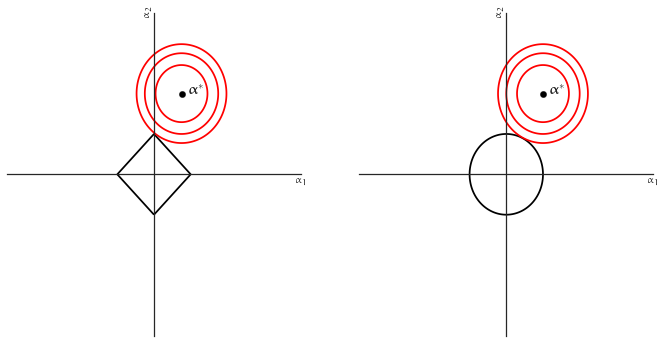

In [26]:
size = figsize()[0]
size = (size*2, size)
fig, ax = plt.subplots(1,2, figsize=size)

delta = 0.003
lim_low = -2
lim_hi = 4
xrange = np.arange(lim_low, lim_hi, delta)
yrange = np.arange(lim_low, lim_hi, delta)
X, Y = np.meshgrid(xrange,yrange) 

reg_contour(l1, 1.0, X, Y, ax[0])

xmin = 0.75
ymin = 2
F = 2*l2(X-xmin, Y-ymin)

ax[0].contour(X, Y, F, range(0,4), colors='red')
ax[0].scatter(xmin, ymin, marker='o', s=40, c='black')
ax[0].annotate(r'$\boldsymbol{\alpha}^*$', (xmin+0.2, ymin), size=15)

xmin = 1
ymin = 2
F = 2*l2(X-xmin, Y-ymin)

reg_contour(l2, 1.0, X, Y, ax[1])
ax[1].contour(X, Y, F, range(0,4), colors='red')
ax[1].scatter(xmin, ymin, marker='o', s=40, c='black')
ax[1].annotate(r'$\boldsymbol{\alpha}^*$', (xmin+0.2, ymin), size=15)

fig.savefig("../writing/thesis/figures/constraints.pdf")